<ipython-input-1-2b1a02f0f144>:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0,0,1,1], elev=20, azim=20)


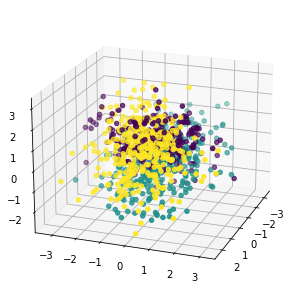

In [1]:

import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.datasets._samples_generator import make_classification 

X, y = make_classification(n_samples=1000, n_features=3, n_redundant=0,n_classes=3, n_informative=2, n_clusters_per_class=1,class_sep=0.5,random_state=10)

fig = plt.figure()
ax = Axes3D(fig, rect=[0,0,1,1], elev=20, azim=20)
ax.scatter(X[:,0], X[:,1], X[:,2], marker = 'o', c=y)


[0.43377069 0.3716351 ]
[1.21083449 1.0373882 ]


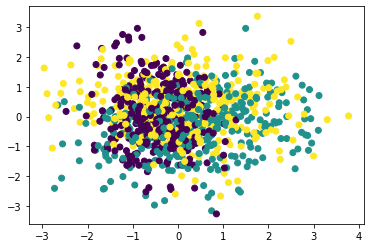

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

X_new = pca.transform(X)
plt.scatter(X_new[:,0], X_new[:,1], marker='o', c=y)
# plt.show()



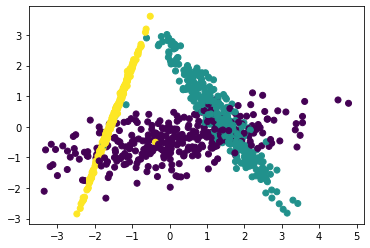

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

x_new = lda.transform(X)
plt.scatter(x_new[:,0], x_new[:,1], marker='o', c=y)
# plt.show()

In [4]:
import pandas as pd 
feature_dict = {i:label for i, label in zip(range(4),("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width"))}
print(feature_dict)

df = pd.read_csv('iris.csv', header=None, sep=',')
df.columns = ["Number"] + [l for i, l in sorted(feature_dict.items())] + ['Species']

# to drop the empty line at file-end
df.dropna(how='all', inplace=True)

# print(df.tail())


{0: 'Sepal.Length', 1: 'Sepal.Width', 2: 'Petal.Length', 3: 'Petal.Width'}


In [6]:
from sklearn.preprocessing import LabelEncoder

X = df[["Sepal.Length", "Sepal.Width","Petal.Length","Petal.Width"]].values
X = X[1:,:]
for i in range(len(X)):
    X[i,:] = [float(x) for x in X[i,:]]

# print(X.shape)

# print(X)

y = df['Species'].values
y = y[1:] # delete species 标签
# print(y.shape)

# print(y)

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

# print(y)

label_dict = {1:'setosa', 2:'versicolor', 3:'virginica'}

np.set_printoptions(precision=4)
mean_vectors = []
for c1 in range(1,4):
    mean_vectors.append(np.mean(X[y==c1], axis=0))
    # print('Mean Vector Class %s : %s \n' % (c1, mean_vectors[c1 - 1]))

